<h1><center>Car Price Prediction with
Machine Learning</center></h1>.

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load the Dataset into Pandas dataframe

In [3]:
cars_df = pd.read_csv("car data.csv")
type(cars_df)

pandas.core.frame.DataFrame

In [4]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Shape of Our Dataset

In [5]:
cars_df.shape

(301, 9)

### Display information about the Dataset

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Check Null Values

In [7]:
cars_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Basic Descriptive Statistics:

In [8]:
cars_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Preprocessing

In [9]:
cars_df.sample()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
183,Bajaj Discover 100,2013,0.27,0.47,21000,Petrol,Individual,Manual,0


**Using the 'Year' column we're going to create 'New Column' which defines 'Age of the Car' as per the 'Current Year'.**

In [10]:
# Importing Data_Time_Module 
import datetime
date_time = datetime.datetime.now()
print(date_time)

2024-10-22 17:48:51.514860


**It is showing current date time**

#### *Age of the car as per the current year*

In [11]:
# Fetching Current Year

cars_df['Age'] = date_time.year - cars_df['Year']
cars_df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [12]:
# Drop year column
cars_df.drop('Year', axis=1, inplace=True)  


In [13]:
cars_df.tail(3)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
298,city,3.35,11.0,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.5,9000,Diesel,Dealer,Manual,0,7
300,brio,5.30,5.9,5464,Petrol,Dealer,Manual,0,8


## Outlier Removal

<Axes: ylabel='Selling_Price'>

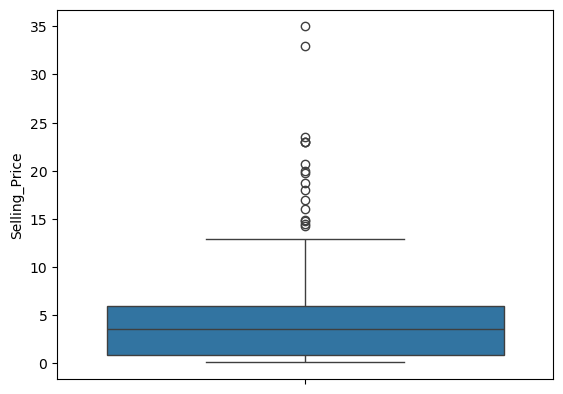

In [14]:
sns.boxplot(cars_df['Selling_Price'])

In [15]:
print(sorted(cars_df['Selling_Price'],reverse= True))

[35.0, 33.0, 23.5, 23.0, 23.0, 23.0, 20.75, 19.99, 19.75, 18.75, 18.0, 17.0, 16.0, 14.9, 14.73, 14.5, 14.25, 12.9, 12.5, 11.75, 11.5, 11.45, 11.25, 11.25, 11.25, 10.9, 10.25, 10.11, 9.7, 9.65, 9.5, 9.25, 9.25, 9.25, 9.15, 9.1, 8.99, 8.75, 8.65, 8.55, 8.5, 8.4, 8.4, 8.35, 8.25, 8.25, 7.9, 7.75, 7.75, 7.75, 7.5, 7.5, 7.5, 7.45, 7.45, 7.45, 7.4, 7.25, 7.25, 7.2, 7.05, 6.95, 6.85, 6.75, 6.7, 6.6, 6.5, 6.5, 6.45, 6.4, 6.25, 6.25, 6.15, 6.1, 6.0, 6.0, 6.0, 6.0, 5.95, 5.95, 5.9, 5.85, 5.85, 5.8, 5.75, 5.75, 5.65, 5.5, 5.5, 5.5, 5.5, 5.5, 5.4, 5.4, 5.35, 5.3, 5.3, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.2, 5.15, 5.11, 5.0, 4.95, 4.95, 4.9, 4.9, 4.85, 4.8, 4.8, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.65, 4.6, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.4, 4.35, 4.15, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 3.95, 3.95, 3.9, 3.9, 3.8, 3.75, 3.75, 3.65, 3.6, 3.51, 3.5, 3.5, 3.49, 3.45, 3.35, 3.35, 3.25, 3.25, 3.25, 3.15, 3.1, 3.1, 3.1, 3.1, 3.0, 3.0, 3.0, 3.0, 2.95, 2.95, 2.9, 2.9, 2.9, 2.85, 2.85

### Fetching Rows having the outliers

In [16]:
# Passing Boolean series to our dataset
cars_df[(cars_df['Selling_Price']>= 33.0) & (cars_df['Selling_Price']<= 35.0)]
# Considering this our outliers, which are very far from other values

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [17]:
# By doing this it will print other rows by skipping these two rows
cars_df[~(cars_df['Selling_Price']>= 33.0) & (cars_df['Selling_Price']<= 35.0)]
cars_df = cars_df[~(cars_df['Selling_Price']>= 33.0) & (cars_df['Selling_Price']<= 35.0)]
cars_df.shape

(299, 9)

### Encoding the Categorical Columns

In [18]:
cars_df.head(1)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [19]:
cars_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [20]:
cars_df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
cars_df['Fuel_Type']= cars_df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [21]:
cars_df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
cars_df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
cars_df['Selling_type'].map({'Dealer':0, 'Individual':1})
cars_df['Selling_type'] = cars_df['Selling_type'].map({'Dealer':0, 'Individual':1})

In [24]:
cars_df['Selling_type'].unique()

array([0, 1], dtype=int64)

In [25]:
cars_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
cars_df['Transmission'].map({'Manual':0, 'Automatic':1})
cars_df['Transmission'] = cars_df['Transmission'].map({'Manual':0, 'Automatic':1})

In [27]:
cars_df['Transmission'].unique()

array([0, 1], dtype=int64)

In [28]:
cars_df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


### Store Feature Column in 'X' & Target Column in 'y'

In [29]:
X = cars_df.drop(['Car_Name','Selling_Price'],axis=1)
y = cars_df['Selling_Price']


### Splitting The Dataset into The Training Set And Test Set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
print(X_train.shape, y_train.shape)


(239, 7) (239,)


### *Our Target Column Contain continous values so this a 'Regression Problem'so import "Different Regression Models"*

### Import Model

In [32]:
!pip install xgboost

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Model Training

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xbg = GradientBoostingRegressor()
xbg.fit(X_train, y_train)

xg =XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction On Test Data

In [35]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xbg.predict(X_test)
y_pred4 = xg.predict(X_test)


### Evaluating the Algorithm 
**r2_score is a very important metric to evaluate the performance of a Regression_based Machine Learning Model,the more the value of r2_score near to 1, the better is the Model(Best_Score is 1.0)**

In [36]:
from sklearn import metrics

In [37]:
score1= metrics.r2_score(y_test, y_pred1)*100
score2= metrics.r2_score(y_test, y_pred2)*100
score3= metrics.r2_score(y_test, y_pred3)*100
score4= metrics.r2_score(y_test, y_pred4)*100

In [38]:
print(score1, score2, score3, score4)

67.84776215585448 73.45006979124837 85.75017593913309 87.43449962017417


In [39]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                          'R2_Score':[score1,score2,score3,score4]})

In [40]:
final_data

,Models,R2_Score
0,LR,67.847762
1,RF,73.450070
2,GBR,85.750176
3,XG,87.434500


<Axes: xlabel='Models', ylabel='R2_Score'>

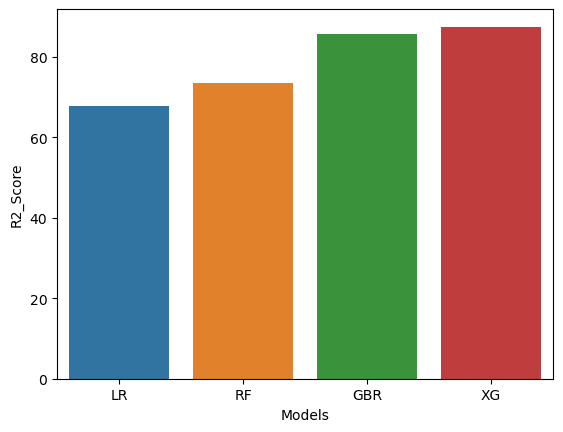

In [41]:
sns.barplot(x='Models', y='R2_Score', hue='Models', data=final_data, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], legend=False)


**From this Bar Plot 'XG'is the Best Model for this Dataset**

### Save The Model

In [42]:
xg = XGBRegressor()
xg = xg.fit(X,y)

### Prediction On New Data

In [43]:
# Renaming columns in data_new to match the training data
data_new = pd.DataFrame({
    'Present_Price': [5.59],
    'Driven_kms': [27000],
    'Fuel_Type': [0],
    'Selling_type': [0],
    'Transmission': [0],
    'Owner': [0],
    'Age': [8]
})

In [44]:
# Running prediction
y_pred4 = xg.predict(data_new)
print(y_pred4)

[3.5146294]


## Conclusion:
**The prediction [3.5146294] means that based on the information provided (such as the car's price, kilometers driven, fuel type, etc.), the machine learning model estimates that the selling price of the car would be approximately 3.51 units in the same currency or measure as the training data (e.g., thousands or lakhs). Essentially, the model is forecasting that the car could sell for around 3.51 in value based on its current condition and features.**